# Problemas de distribución de probabilidad

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [1]:
from scipy.stats import binom

# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [ ]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}") #¿Cuál es la probabilidad de obtener exactamente 2 éxitos en 10 intentos?
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}") #¿Cuál es la probabilidad de obtener hasta 2 éxitos en 10 intentos? (0, 1 o 2)
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}") #¿Cuántos éxitos debemos esperar para cubrir el 90% de los casos?
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}") #Generar 2000 experimentos para ver qué resultados obtenemos.

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


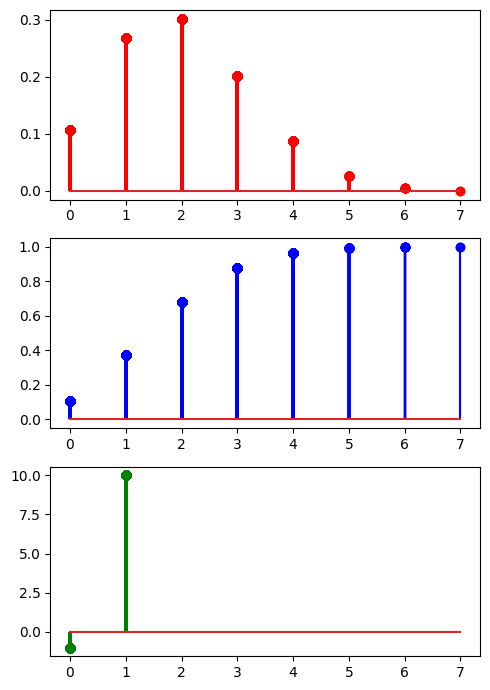

In [4]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1

Escriba las funciones anteriores pero para distribuciones normales y uniformes.

**Normal**

In [5]:
from scipy.stats import norm

# Función de densidad de probabilidad (PDF) - Probabilidad exacta en un punto
def dnorm(x, mean=0, std=1):
    """
    Calcula la densidad de probabilidad de la distribución normal.
    """
    result = norm.pdf(x, loc=mean, scale=std)
    return result

# Función de distribución acumulada (CDF) - Probabilidad de que X sea menor o igual a un valor dado
def pnorm(q, mean=0, std=1):
    """
    Calcula la probabilidad acumulada de la distribución normal.
    """
    result = norm.cdf(q, loc=mean, scale=std)
    return result

# Función cuantil (PPF) - Encuentra el valor X dado un percentil
def qnorm(p, mean=0, std=1):
    """
    Calcula el cuantil de la distribución normal para una probabilidad dada.
    """
    result = norm.ppf(p, loc=mean, scale=std)
    return result

# Generador de valores aleatorios de la distribución normal
def rnorm(n, mean=0, std=1):
    """
    Genera variables aleatorias a partir de la distribución normal.
    """
    result = norm.rvs(loc=mean, scale=std, size=n)
    return result

In [6]:
print(f"PDF en x=0 para N(0,1): {dnorm(0)}")
print(f"CDF en x=1.96 para N(0,1): {pnorm(1.96)}")
print(f"Cuantil para p=0.95 en N(0,1): {qnorm(0.95)}")
print(f"Generar 5 valores aleatorios de N(0,1): {rnorm(5)}")

PDF en x=0 para N(0,1): 0.3989422804014327
CDF en x=1.96 para N(0,1): 0.9750021048517795
Cuantil para p=0.95 en N(0,1): 1.6448536269514722
Generar 5 valores aleatorios de N(0,1): [-0.87798259 -0.82688035 -0.22647889  0.36736551  0.91358463]


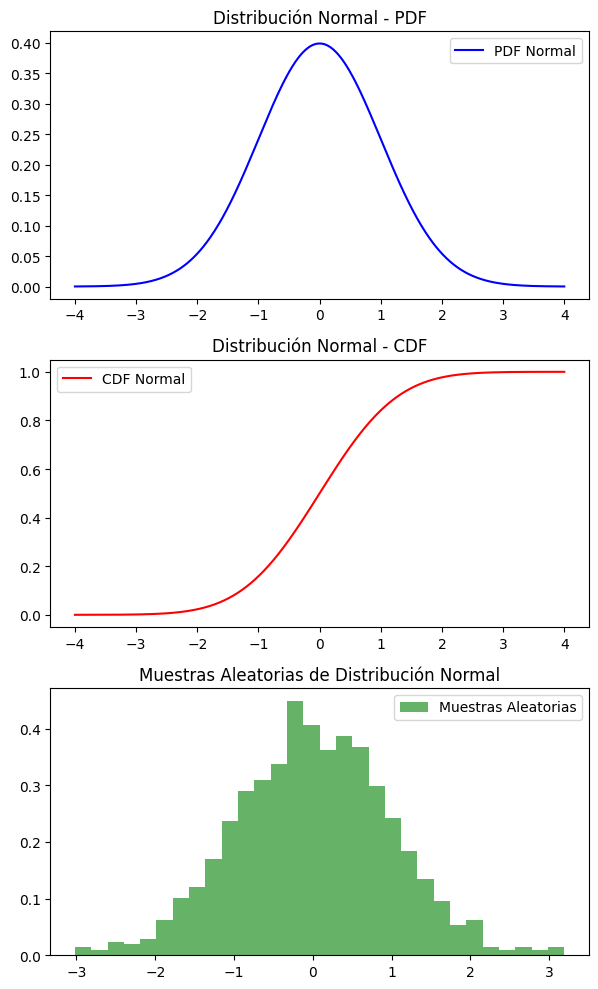

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
mean, std = 0, 1
x_norm = np.linspace(-4, 4, 1000)

# Cálculos
pdf_norm = dnorm(x_norm, mean, std)
cdf_norm = pnorm(x_norm, mean, std)
random_norm = rnorm(1000, mean, std)

# Gráficos
fig, axes = plt.subplots(3, 1, figsize=(6, 10))

axes[0].plot(x_norm, pdf_norm, 'b-', label='PDF Normal')
axes[0].set_title("Distribución Normal - PDF")
axes[0].legend()

axes[1].plot(x_norm, cdf_norm, 'r-', label='CDF Normal')
axes[1].set_title("Distribución Normal - CDF")
axes[1].legend()

axes[2].hist(random_norm, bins=30, density=True, alpha=0.6, color='g', label='Muestras Aleatorias')
axes[2].set_title("Muestras Aleatorias de Distribución Normal")
axes[2].legend()

plt.tight_layout()
plt.show()

**Uniforme**

In [9]:
from scipy.stats import uniform

# Función de densidad de probabilidad (PDF)
def dunif(x, min_val=0, max_val=1):
    """
    Calcula la densidad de probabilidad de la distribución uniforme.
    """
    result = uniform.pdf(x, loc=min_val, scale=max_val - min_val)
    return result

# Función de distribución acumulada (CDF)
def punif(q, min_val=0, max_val=1):
    """
    Calcula la probabilidad acumulada de la distribución uniforme.
    """
    result = uniform.cdf(q, loc=min_val, scale=max_val - min_val)
    return result

# Función cuantil (PPF)
def qunif(p, min_val=0, max_val=1):
    """
    Calcula el cuantil de la distribución uniforme para una probabilidad dada.
    """
    result = uniform.ppf(p, loc=min_val, scale=max_val - min_val)
    return result

# Generador de valores aleatorios de la distribución uniforme
def runif(n, min_val=0, max_val=1):
    """
    Genera variables aleatorias a partir de la distribución uniforme.
    """
    result = uniform.rvs(loc=min_val, scale=max_val - min_val, size=n)
    return result

In [10]:
print(f"PDF en x=0.5 para U(0,1): {dunif(0.5)}")
print(f"CDF en x=0.5 para U(0,1): {punif(0.5)}")
print(f"Cuantil para p=0.75 en U(0,1): {qunif(0.75)}")
print(f"Generar 5 valores aleatorios de U(0,1): {runif(5)}")

PDF en x=0.5 para U(0,1): 1.0
CDF en x=0.5 para U(0,1): 0.5
Cuantil para p=0.75 en U(0,1): 0.75
Generar 5 valores aleatorios de U(0,1): [0.87052697 0.63141892 0.53250407 0.11539464 0.60563789]


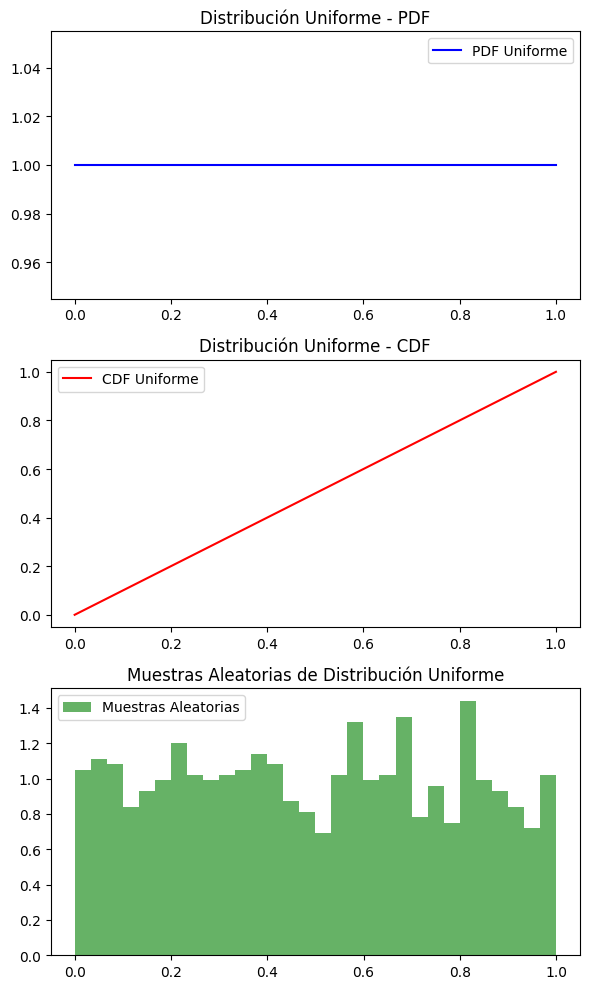

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
min_val, max_val = 0, 1
x_unif = np.linspace(min_val, max_val, 1000)

# Cálculos
pdf_unif = dunif(x_unif, min_val, max_val)
cdf_unif = punif(x_unif, min_val, max_val)
random_unif = runif(1000, min_val, max_val)

# Gráficos
fig, axes = plt.subplots(3, 1, figsize=(6, 10))

axes[0].plot(x_unif, pdf_unif, 'b-', label='PDF Uniforme')
axes[0].set_title("Distribución Uniforme - PDF")
axes[0].legend()

axes[1].plot(x_unif, cdf_unif, 'r-', label='CDF Uniforme')
axes[1].set_title("Distribución Uniforme - CDF")
axes[1].legend()

axes[2].hist(random_unif, bins=30, density=True, alpha=0.6, color='g', label='Muestras Aleatorias')
axes[2].set_title("Muestras Aleatorias de Distribución Uniforme")
axes[2].legend()

plt.tight_layout()
plt.show()